# Set Up

In [4]:
# import the necessary packages
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import pandas as pd 
import seaborn as sns

import torch 
import torch.nn as nn
import albumentations as A
from PIL  import Image 

from models.model import *
from utils import * 
from utils.dataset import * 
from utils.engine import * 

# Load dataset

In [5]:
train = pd.read_csv('dataset/celeb_faces_data/train.csv')

In [6]:
train.head()

,Unnamed: 0,name,unmasked_path,class,path_to_cropped_im,path_to_cropped_image,path_to_masked_image
0,0,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...
1,1,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...
2,2,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...
3,3,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...
4,4,mindy_kaling,dataset/celeb_faces_data/train/mindy_kaling/ht...,4,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/cr...,dataset/celeb_faces_data/train/mindy_kaling/ma...


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


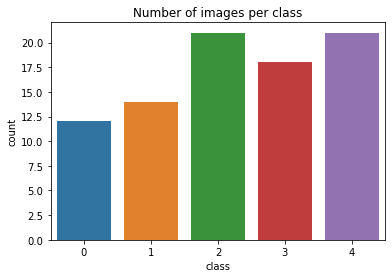

In [7]:
sns.countplot(train['class'])
plt.title('Number of images per class');

In [8]:
valid = pd.read_csv('dataset/celeb_faces_data/valid.csv')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


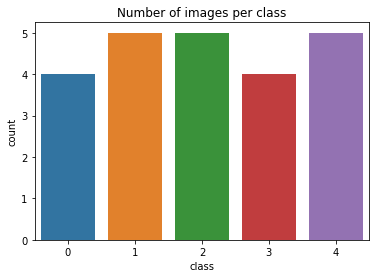

In [9]:
sns.countplot(valid['class'])
plt.title('Number of images per class');

# Training 

In [10]:
# Setting Hyper Parametres 
lr = 0.0001 
epochs = 100
batch_size = 16 
model_path = 'face_recognation.pth' 
device = torch.device('cuda')

model = FaceNet(num_classes = 5 , pretrained = True)
model = model.to(device)

train_dataset = MaskFaceDetectionDataset(train.path_to_masked_image.values , train['class'].values , is_train = True) 
valid_dataset = MaskFaceDetectionDataset(valid.path_to_masked_image.values , valid['class'].values  ,  is_train = False) 

def loss_fn(outputs, targets) : 
    targets = targets.to(device , dtype = torch.long)
    return nn.CrossEntropyLoss()(outputs , targets )

val_loss , train_loss = run(
    model,
    train_dataset,
    valid_dataset,
    loss_fn,
    lr,
    epochs,
    batch_size,
    batch_size,
    device,
    model_path,
)

  0%|          | 0.00/107M [00:00<?, ?B/s]

--------- Epoch 0 ---------


100%|██████████| 6/6 [00:01<00:00,  3.23it/s, loss=1.3] 

 train_loss  = 1.283385177453359



100%|██████████| 2/2 [00:00<00:00, 10.95it/s, loss=1.1]


 val_loss  = 1.0958970189094543
--------- Epoch 1 ---------


100%|██████████| 6/6 [00:01<00:00,  5.78it/s, loss=0.643]

 train_loss  = 0.7211813628673553



100%|██████████| 2/2 [00:00<00:00, 10.52it/s, loss=0.718]


 val_loss  = 0.6890708208084106
--------- Epoch 2 ---------


100%|██████████| 6/6 [00:01<00:00,  5.80it/s, loss=0.304]

 train_loss  = 0.345169335603714



100%|██████████| 2/2 [00:00<00:00, 10.66it/s, loss=0.283]


 val_loss  = 0.278624027967453
--------- Epoch 3 ---------


100%|██████████| 6/6 [00:01<00:00,  5.74it/s, loss=0.213]

 train_loss  = 0.226148322224617



100%|██████████| 2/2 [00:00<00:00, 10.57it/s, loss=0.211]


 val_loss  = 0.2663198970258236
--------- Epoch 4 ---------


100%|██████████| 6/6 [00:01<00:00,  5.08it/s, loss=0.112]

 train_loss  = 0.12499168825646241



100%|██████████| 2/2 [00:00<00:00, 10.44it/s, loss=0.233]

 val_loss  = 0.33882936835289
--------- Epoch 5 ---------



100%|██████████| 6/6 [00:01<00:00,  5.68it/s, loss=0.103]

 train_loss  = 0.10420557359854381



100%|██████████| 2/2 [00:00<00:00, 10.53it/s, loss=0.111]


 val_loss  = 0.14985558949410915
--------- Epoch 6 ---------


100%|██████████| 6/6 [00:01<00:00,  5.45it/s, loss=0.0923]

 train_loss  = 0.08997215578953426



100%|██████████| 2/2 [00:00<00:00, 10.27it/s, loss=0.0753]


 val_loss  = 0.08918228931725025
--------- Epoch 7 ---------


100%|██████████| 6/6 [00:01<00:00,  5.73it/s, loss=0.0719]

 train_loss  = 0.07606848794966936



100%|██████████| 2/2 [00:00<00:00, 10.62it/s, loss=0.153]

 val_loss  = 0.21263878792524338
--------- Epoch 8 ---------



100%|██████████| 6/6 [00:01<00:00,  5.78it/s, loss=0.0464]

 train_loss  = 0.047712056897580624



100%|██████████| 2/2 [00:00<00:00,  9.90it/s, loss=0.195]

 val_loss  = 0.26519013568758965
--------- Epoch 9 ---------



100%|██████████| 6/6 [00:01<00:00,  5.74it/s, loss=0.106] 

 train_loss  = 0.17145483568310738



100%|██████████| 2/2 [00:00<00:00, 10.47it/s, loss=0.139]

 val_loss  = 0.1541116088628769
--------- Epoch 10 ---------



100%|██████████| 6/6 [00:01<00:00,  5.76it/s, loss=0.051] 

 train_loss  = 0.053902136938025556



100%|██████████| 2/2 [00:00<00:00,  7.99it/s, loss=0.076]


 val_loss  = 0.06376143358647823
--------- Epoch 11 ---------


100%|██████████| 6/6 [00:01<00:00,  4.75it/s, loss=0.0684]

 train_loss  = 0.06363698250303666



100%|██████████| 2/2 [00:00<00:00, 10.45it/s, loss=0.0809]

 val_loss  = 0.09517338871955872
--------- Epoch 12 ---------



100%|██████████| 6/6 [00:01<00:00,  5.72it/s, loss=0.163] 

 train_loss  = 0.31348619392762583



100%|██████████| 2/2 [00:00<00:00, 10.54it/s, loss=0.275]

 val_loss  = 0.40167688578367233
--------- Epoch 13 ---------



100%|██████████| 6/6 [00:01<00:00,  5.71it/s, loss=0.103] 

 train_loss  = 0.11322218365967274



100%|██████████| 2/2 [00:00<00:00, 10.45it/s, loss=0.226]

 val_loss  = 0.17743279226124287
--------- Epoch 14 ---------



100%|██████████| 6/6 [00:01<00:00,  5.89it/s, loss=0.0676]

 train_loss  = 0.07881422371913989



100%|██████████| 2/2 [00:00<00:00, 10.47it/s, loss=0.227]

Epoch    15: reducing learning rate of group 0 to 2.0000e-05.
 val_loss  = 0.19887933135032654
--------- Epoch 15 ---------



100%|██████████| 6/6 [00:01<00:00,  5.79it/s, loss=0.102] 

 train_loss  = 0.0976402700568239



100%|██████████| 2/2 [00:00<00:00, 10.61it/s, loss=0.129]

 val_loss  = 0.13392075896263123
--------- Epoch 16 ---------



100%|██████████| 6/6 [00:01<00:00,  5.73it/s, loss=0.0616]

 train_loss  = 0.06357162135342757



100%|██████████| 2/2 [00:00<00:00, 10.82it/s, loss=0.0888]


 val_loss  = 0.10960073955357075
Eraly Stopping on Epoch 16
Best Loss =  0.06376143358647823


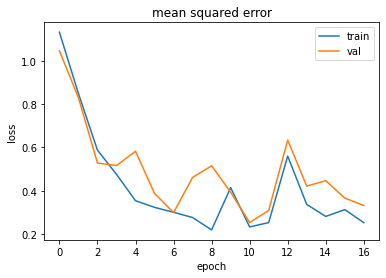

In [11]:
# summarize history for accuracy
plt.plot(np.sqrt(train_loss)) 
plt.plot(np.sqrt(val_loss))
plt.title('mean squared error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Model Evaluation 

In [12]:
def softmax(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # dito
    return e_x / div

In [13]:
pred  = predict(model , valid_dataset)
pred = sigmod(pred)
valid['predictions'] = softmax(pred).argmax(axis=1)

100%|██████████| 1/1 [00:00<00:00,  6.35it/s]


In [14]:
accuracy_score(valid['class'].values, valid.predictions.values)

1.0

<AxesSubplot:>

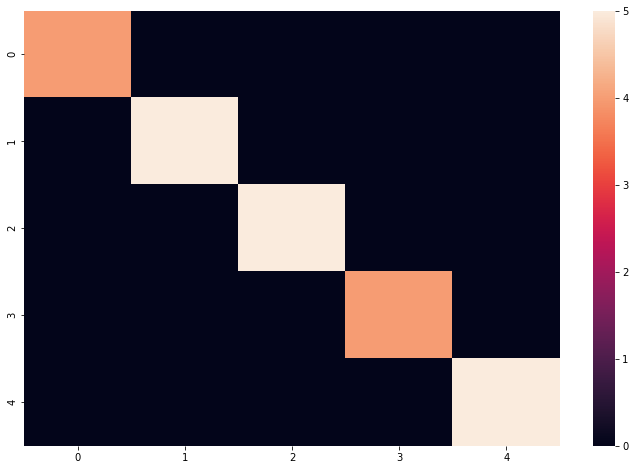

In [15]:
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(valid['class'].values, valid.predictions.values))

In [16]:
print(metrics.classification_report(valid['class'].values, valid.predictions.values))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



# Export model with ONNX

In [17]:
# Export the model
x = valid_dataset[1]['image'].unsqueeze(0).to(device , dtype = torch.float)
torch.onnx.export(model,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "masked_face_recognizer.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable lenght axes
                                'output' : {0 : 'batch_size'}}
                 )